In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

import pickle

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
# cp -r /content/drive/MyDrive/X-RAY/classification-dataset-train-test .

In [ ]:
train_data_dir = 'classification-dataset-train-test/train'
test_data_dir = 'classification-dataset-train-test/test'
input_shape = (224, 224,3)
num_classes = 14
batch_size = 32
epochs = 5

In [ ]:
base_model = MobileNet(
    include_top=False, weights='imagenet', input_shape=input_shape)

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(input_shape[0],input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4823 images belonging to 14 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(input_shape[0],input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1609 images belonging to 14 classes.


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 14)                3598      
                                                                 
Total params: 3,494,862
Trainable params: 265,998
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/5
151/151 [==============================] - 101s 603ms/step - loss: 2.5257 - accuracy: 0.1634 - val_loss: 2.3768 - val_accuracy: 0.1925
Epoch 2/5
151/151 [==============================] - 90s 598ms/step - loss: 2.3007 - accuracy: 0.2291 - val_loss: 2.3384 - val_accuracy: 0.2081
Epoch 3/5
151/151 [==============================] - 90s 597ms/step - loss: 2.2113 - accuracy: 0.2606 - val_loss: 2.2945 - val_accuracy: 0.2325
Epoch 4/5
151/151 [==============================] - 90s 597ms/step - loss: 2.1100 - accuracy: 0.2979 - val_loss: 2.3252 - val_accuracy: 0.2231
Epoch 5/5
151/151 [==============================] - 90s 596ms/step - loss: 2.0444 - accuracy: 0.3268 - val_loss: 2.3030 - val_accuracy: 0.2206


**Saving Model using save method and pickle dump**

In [ ]:
model.save('mobilenet_model.h5')

In [ ]:
with open('mobilenet_model_pickle','wb') as file:
    pickle.dump(model,file)

**Printing Details About The Trained Model**

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

51/51 [==============================] - 23s 443ms/step - loss: 2.3037 - accuracy: 0.2200
Test Loss: 2.303736686706543
Test Accuracy: 0.22001242637634277


In [ ]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

51/51 [==============================] - 23s 445ms/step


In [ ]:
y_true = test_generator.classes

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

In [ ]:
class_labels = list(test_generator.class_indices.keys())

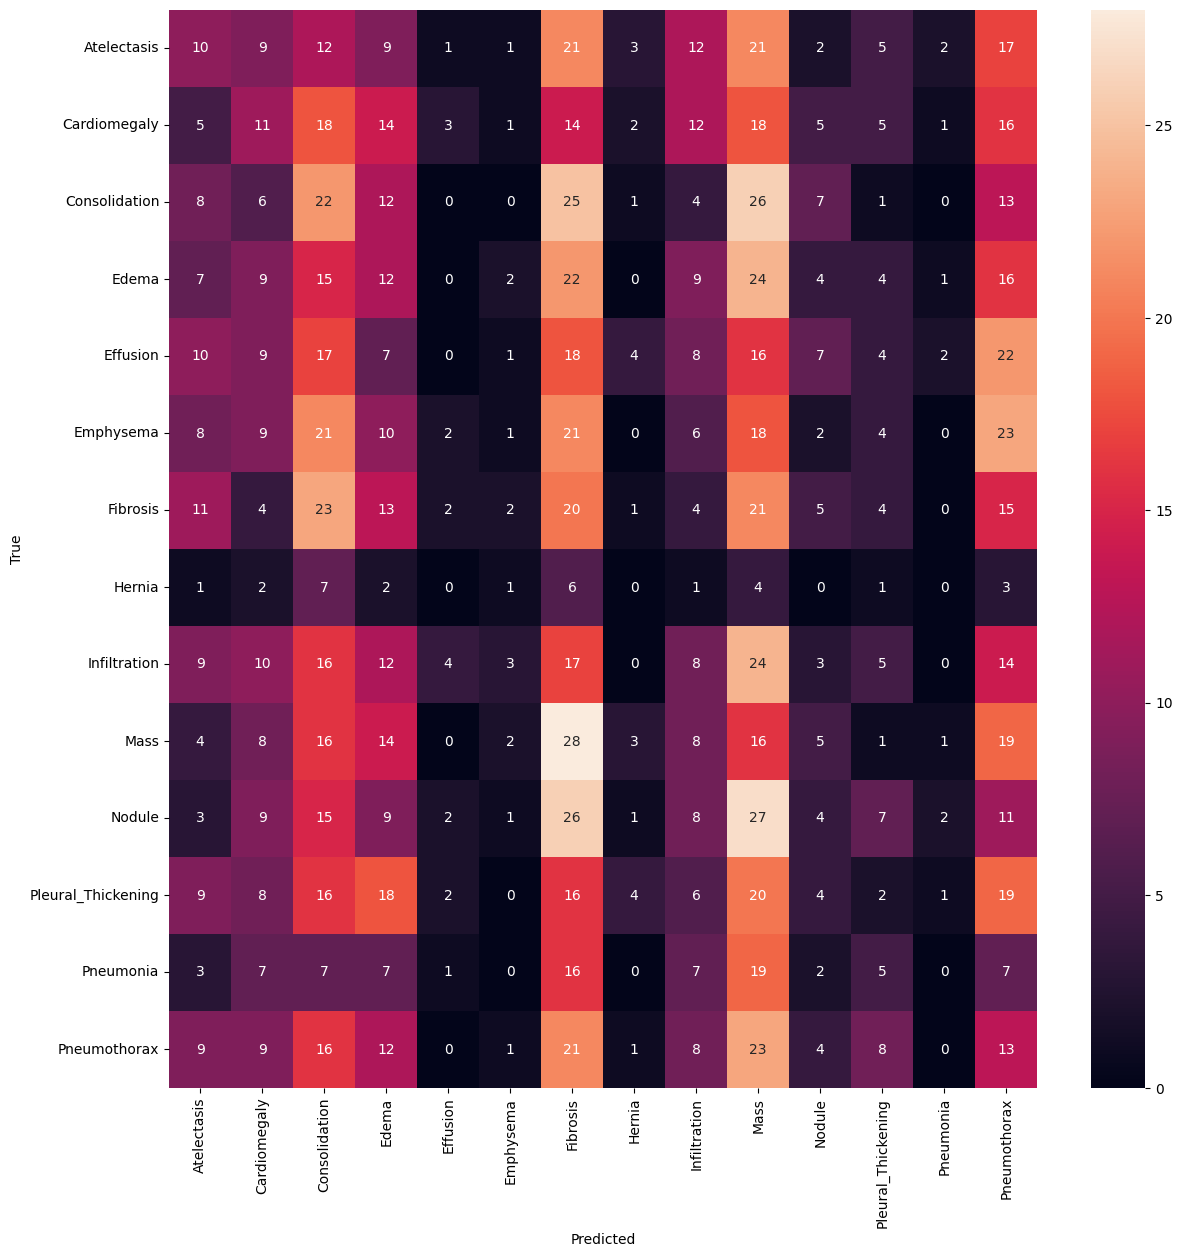

In [ ]:
plt.figure(figsize=(len(class_labels), len(class_labels)))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()